### Nom et Prénoms : SOSSOU Didi Orlog
### Parcours :  IA Big Data

## I- Introduction example

#### 1- Réécriture sous la forme standard en mettant la contrainte sous la forme 
$$ g(\theta) \leq 0 $$

$$
\min_{\theta_1, \theta_2} \frac{1}{2} (\theta_1^2 + \theta_2^2)
$$

#### Sc:

$$
1 - \theta_1 + \theta_2  \leq 0
$$


In [57]:
import sympy as sp
sp.init_printing()
theta1, theta2, mu = sp.symbols('theta1 theta2 mu', real=True)
f = (theta1**2 + theta2**2) / 2  # Objectif
g =  1 - theta1 + theta2 # Contrainte réécrite sous la forme g(θ) ≤ 0

#Affichage
f, g

#### 2 - Le Lagrangien est donné par :

$$ L(\theta_1, \theta_2, \mu) = \frac{1}{2} (\theta_1^2 + \theta_2^2) + \mu (1 - \theta_1 + \theta_2) $$


avec

a. $$ \mu \geq 0 $$
b. $$ \mu (1 - \theta_1 + \theta_2) = 0 $$



In [58]:
# Définition du Lagrangien
L = f + mu * g

L

#### 3- Stationarité

$$
\frac{\partial L}{\partial \theta_1} = 0, \quad \frac{\partial L}{\partial \theta_2} = 0
$$


$$
L(\theta_1, \theta_2, \mu) = \frac{1}{2} (\theta_1^2 + \theta_2^2) + \mu (1 - \theta_1 + \theta_2)
$$
  

$$
\frac{\partial L}{\partial \theta_1} = \theta_1 - \mu = 0 \Rightarrow \theta_1 = \mu
$$

$$
\frac{\partial L}{\partial \theta_2} = \theta_2 + \mu = 0 \Rightarrow \theta_2 = -\mu
$$


In [59]:
# Calcul des dérivées partielles
grad_L_theta1 = sp.diff(L, theta1)
grad_L_theta2 = sp.diff(L, theta2)

# Résolution du systeme
sol_theta = sp.solve([grad_L_theta1, grad_L_theta2], (theta1, theta2))

print("Solution en fonction de μ :")
sp.Eq(theta1, sol_theta[theta1]), sp.Eq(theta2, sol_theta[theta2])

Solution en fonction de μ :


#### 4- Le dual s’écrit :

$$
\max_{\mu \geq 0} \quad \min_{\theta_1, \theta_2} \mathcal{L}(\theta_1, \theta_2, \mu)
$$
avec 
$$
g(\mu) = \min_{\theta_1, \theta_2} L(\theta_1, \theta_2, \mu)
$$

On substitue $\theta_1 = \mu$ et $\theta_2 = -\mu$ dans $L$ :

$$
g(\mu) = L(\mu, -\mu, \mu) = \frac{1}{2} (\mu^2 + (-\mu)^2) + \mu (1 - \mu + (-\mu))
$$

$$
= \frac{1}{2} (\mu^2 + \mu^2) + \mu (1 - 2\mu)
$$

$$
= \mu^2 + \mu - 2\mu^2
$$

$$
= -\mu^2 + \mu
$$

Donc, la **fonction duale** est :

$$
g(\mu) = -\mu^2 + \mu
$$

In [60]:
# Substitution des solutions dans le Lagrangien
theta1_opt, theta2_opt = sol_theta[theta1], sol_theta[theta2]
L_dual = L.subs({theta1: theta1_opt, theta2: theta2_opt})

# Fonction duale
g_mu = sp.simplify(L_dual)

print("Fonction duale g(μ) :")
g_mu

Fonction duale g(μ) :


In [61]:
# Maximisation de la fonction duale
grad_g_mu = sp.diff(g_mu, mu)
mu_star = sp.solve(grad_g_mu, mu)

# Filtre les solutions admissibles (μ ≥ 0)
mu_star = [m.evalf() for m in mu_star if m >= 0]

print("Valeur optimale de μ* :",mu_star)

Valeur optimale de μ* : [0.500000000000000]


#### 5- Tracé de la fonction duale g(μ) pour illustrer son maximum.


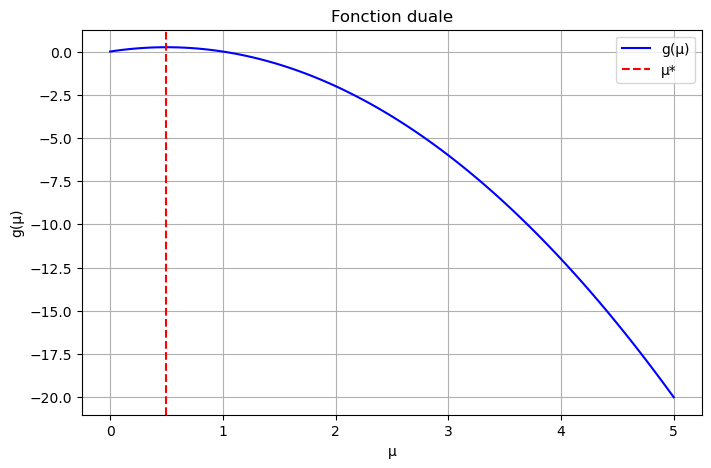

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Conversion de g(mu) en fonction numérique
g_mu_func = sp.lambdify(mu, g_mu, 'numpy')

# Domaine de mu
mu_vals = np.linspace(0, 5, 100)
g_vals = g_mu_func(mu_vals)

plt.figure(figsize=(8, 5))
plt.plot(mu_vals, g_vals, label="g(μ)", color='b')
plt.axvline(mu_star[0], color='r', linestyle='--', label="μ*")
plt.xlabel("μ")
plt.ylabel("g(μ)")
plt.legend()
plt.title("Fonction duale")
plt.grid()
plt.show()


### Graphiquement $\mu^{*}$ = 0.5  d' ou la solution optimale du primal est $\theta^{*}$ = (0.5 , -0.5)

## II- A more evolved problem

### 2.1 Mathematical derivation. . .

### 1- Forme matricielle :  
Développons la fonction objectif :  

$$
\frac{1}{2} (\theta_1 - 3)^2 + \frac{1}{2} (\theta_2 - 1)^2
= \frac{1}{2} \left( \theta_1^2 - 6\theta_1 + 9 + \theta_2^2 - 2\theta_2 + 1 \right).
$$

En regroupant les termes :

$$
\frac{1}{2} (\theta_1^2 + \theta_2^2) - 3\theta_1 - \theta_2 + 5.
$$

Or,  

$$
\|\theta - c\|_2^2 = (\theta - c)^T (\theta - c) = \theta^T \theta - 2c^T \theta + c^T c.
$$

En posant $$ c = \begin{bmatrix} 3 \\ 1 \end{bmatrix}$$ on obtient :

$$
\frac{1}{2} \|\theta - c\|_2^2.
$$

Pour les contraintes, on réécrit :  

$$
\begin{bmatrix} 
1 & 1 \\ 
1 & -1 \\ 
-1 & 1 \\ 
-1 & -1 
\end{bmatrix}
\begin{bmatrix} \theta_1 \\ \theta_2 \end{bmatrix}
\leq 
\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix}.
$$

On pose donc :

$$
A = \begin{bmatrix} 
1 & 1 \\ 
1 & -1 \\ 
-1 & 1 \\ 
-1 & -1 
\end{bmatrix}, \quad
b = \begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix}.
$$

Le problème s’écrit sous la forme :

$$
\min_{\theta} \frac{1}{2} \|\theta - c\|_2^2, \quad \text{sous } A\theta - b \leq 0.
$$

---

### 2. Lagrangien


$$
\mathcal{L}(\theta, \mu) = \frac{1}{2} \|\theta - c\|_2^2 + \mu^T (A\theta - b).
$$

$$\mu \in \mathbb{R}^4  et  \mu \geq 0 $$

---

### 3. Condition stationnaire KKT

#### (a) Développement de la norme 

On développe :

$$
\|\theta - c\|_2^2 = (\theta - c)^T (\theta - c).
$$

$$
\|\theta - c\|_2^2 = \theta^T \theta - 2c^T \theta + c^T c.
$$

#### (b) Gradient  
- Soit $$ f(\theta) = \theta^T \theta $$

$$
D_v f(\theta) = \lim_{h \to 0} \frac{f(\theta + h v) - f(\theta)}{h}.
$$

$$
f(\theta + h v) = (\theta + h v)^T (\theta + h v) = \theta^T \theta + 2h \theta^T v + h^2 v^T v.
$$

$$
f(\theta + h v) - f(\theta) = 2h \theta^T v + h^2 v^T v.
$$

$$
\frac{f(\theta + h v) - f(\theta)}{h} = 2 \theta^T v + h v^T v.
$$

$$
\lim_{h \to 0} \frac{f(\theta + h v) - f(\theta)}{h} = 2 \theta^T v.
$$

$$
\nabla_{\theta} (\theta^T \theta) = 2\theta.
$$

- Soit $$ g(\theta) = \theta^T c $$

$$
D_v g(\theta) = \lim_{h \to 0} \frac{g(\theta + h v) - g(\theta)}{h}.
$$

$$
g(\theta + h v) = (\theta + h v)^T c = \theta^T c + h v^T c.
$$

$$
g(\theta + h v) - f(\theta) = h v^T c.
$$

$$
\frac{f(\theta + h v) - g(\theta)}{h} = v^T c.
$$

$$
\lim_{h \to 0} \frac{g(\theta + h v) - g(\theta)}{h} = v^T c.
$$

$$
\nabla_{\theta} (\theta^T c) = c.
$$



De ce qui precede, 
$$
\nabla_{\theta} (\theta^T \theta) = 2\theta.
$$
et
$$
\nabla_{\theta} (\theta^T c) = c.
$$

Ainsi,

$$
\nabla_{\theta} \|\theta - c\|_2^2 = 2(\theta - c).
$$


---

### 4. Condition stationnaire des KKT et expression de theta


$$
\nabla_{\theta} \mathcal{L} = 0.
$$


$$
\nabla_{\theta} \mathcal{L} = \nabla_{\theta} \left( \frac{1}{2} \|\theta - c\|_2^2 + \mu^T (A\theta - b) \right).
$$

En utilisant les dérivées précédentes :

$$
\nabla_{\theta} \mathcal{L} = (\theta - c) + A^T \mu = 0.
$$

On en déduit :

$$
\theta = c - A^T \mu.
$$

---

### 5. Problème dual  

En remplaçant $$ \theta = c - A^T \mu $$ dans la fonction objectif :

$$
\frac{1}{2} \|\theta - c\|_2^2 = \frac{1}{2} (c - A^T \mu - c)^T (c - A^T \mu - c).
$$

Ce qui donne :

$$
\frac{1}{2} \mu^T A A^T \mu.
$$

Le terme de contrainte devient :

$$
A\theta - b = A(c - A^T \mu) - b = Ac - A A^T \mu - b.
$$

On pose :

$$
H = A A^T, \quad q = -(Ac - b).
$$

Le problème dual est alors :

$$
\min_{\mu} \quad \frac{1}{2} \mu^T H \mu + \mu^T q
$$

sous la contrainte :

$$
\mu \geq 0.
$$




### 2.2 . . . and numerical implementation

### a- Definition des matrices

In [63]:
import numpy as np
c = np.array([3, 1])
b = np.ones(4)
A = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]])

### b- Visualisation

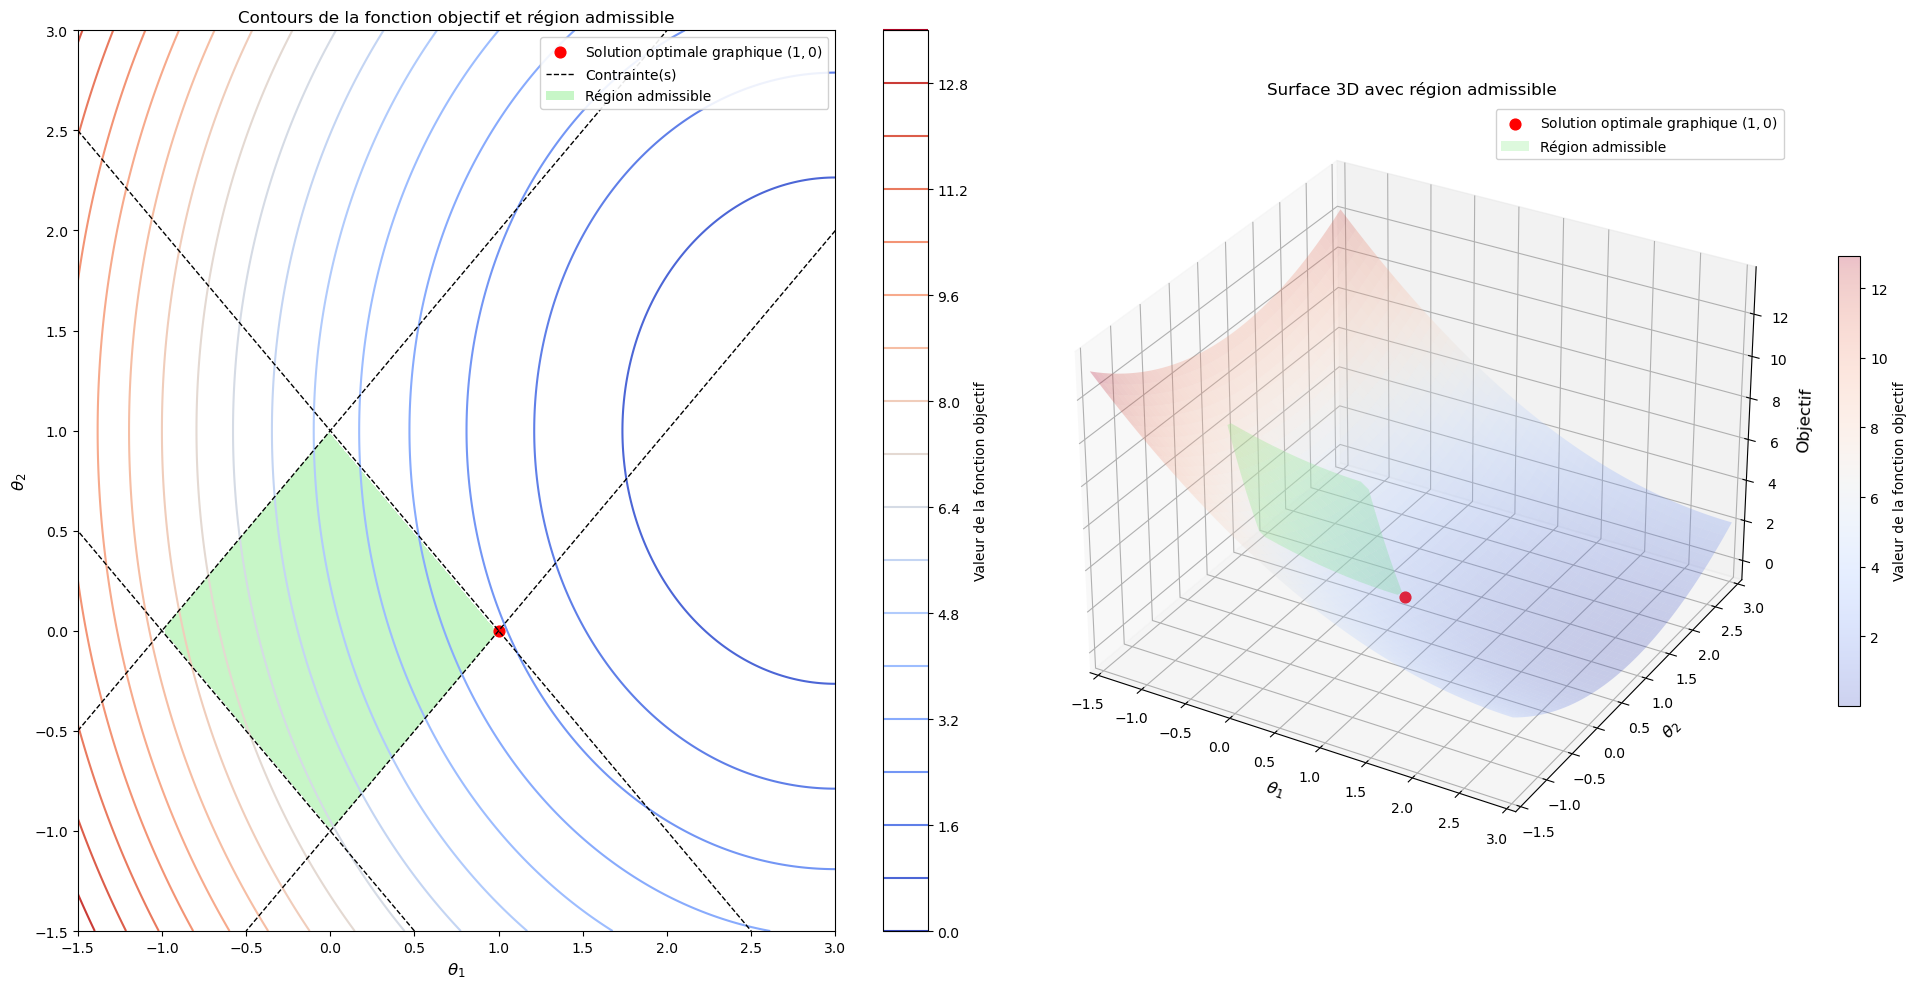

In [64]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from mpl_toolkits.mplot3d import Axes3D

def plot_contours_exercice_section(A, b, c):
    theta1, theta2 = sympy.symbols('theta1 theta2')
    objective_expr = 0.5 * (theta1**2 - 6*theta1 + 9 + theta2**2 - 2*theta2 + 1)
    theta_vec = sympy.Matrix([theta1, theta2])
    constraint_exprs = A @ theta_vec - sympy.Matrix(b)

    t1_vals = np.linspace(-1.5, 3, 200)
    t2_vals = np.linspace(-1.5, 3, 200)
    t1_grid, t2_grid = np.meshgrid(t1_vals, t2_vals)

    objective_func = sympy.lambdify((theta1, theta2), objective_expr, 'numpy')
    objective_vals = objective_func(t1_grid, t2_grid)

    fig = plt.figure(figsize=(20, 10))

    ax1 = fig.add_subplot(121)
    contour = ax1.contour(t1_grid, t2_grid, objective_vals, levels=20, cmap=cm.coolwarm)
    fig.colorbar(contour, ax=ax1, label="Valeur de la fonction objectif")

    # Création du masque de la région admissible selon les contraintes
    constraint_mask = np.ones_like(t1_grid, dtype=bool)
    for expr in constraint_exprs:
        constraint_func = sympy.lambdify((theta1, theta2), expr, 'numpy')
        constraint_vals = constraint_func(t1_grid, t2_grid)
        constraint_mask &= (constraint_vals <= 0)

    ax1.contourf(t1_grid, t2_grid, np.where(constraint_mask, 1, np.nan), levels=[0, 1], colors='lightgreen', alpha=0.5)

    # Tracé des contraintes dans la figure 2D (lignes en pointillés)
    for expr in constraint_exprs:
        constraint_func = sympy.lambdify((theta1, theta2), expr, 'numpy')
        constraint_vals = constraint_func(t1_grid, t2_grid)
        ax1.contour(t1_grid, t2_grid, constraint_vals, levels=[0], colors='k', linestyles='dashed', linewidths=1)

    sol = ax1.scatter(1, 0, color='red', marker='o', s=60, label="Solution optimale graphique $(1,0)$")
    ax1.set_xlim(-1.5, 3)
    ax1.set_ylim(-1.5, 3)
    ax1.set_xlabel(r'$\theta_1$', fontsize=12)
    ax1.set_ylabel(r'$\theta_2$', fontsize=12)
    ax1.set_title("Contours de la fonction objectif et région admissible")
    contrainte_leg = Line2D([0], [0], color='k', linestyle='dashed', linewidth=1, label="Contrainte(s)")
    region_leg = Patch(facecolor='lightgreen', edgecolor='none', alpha=0.5, label="Région admissible")
    ax1.legend(handles=[sol,contrainte_leg, region_leg], loc="upper right", fontsize=10, framealpha=0.9)

    ax2 = fig.add_subplot(122, projection='3d')
    surf = ax2.plot_surface(t1_grid, t2_grid, objective_vals, cmap=cm.coolwarm, alpha=0.25, edgecolor='none', label="Surface de la fonction objectif")
    fig.colorbar(surf, ax=ax2, shrink=0.5, label="Valeur de la fonction objectif")

    # Masque pour la région admissible en 3D
    constraint_surface = np.where(constraint_mask, objective_vals, np.nan)
    const = ax2.plot_surface(t1_grid, t2_grid, constraint_surface, facecolor='lightgreen', alpha=0.4, edgecolor='none', label="Région admissible")
    ax2.scatter(1, 0, objective_func(1, 0), color='red', marker='o', s=60, label="Solution optimale graphique  (1,0)")
    

    ax2.set_xlabel(r'$\theta_1$', fontsize=12)
    ax2.set_ylabel(r'$\theta_2$', fontsize=12)
    ax2.set_zlabel('Objectif', fontsize=12)
    ax2.set_title("Surface 3D avec région admissible")
    ax2.set_xlim(-1.5, 3)
    ax2.set_ylim(-1.5, 3)
    region_leg_3d = Patch(facecolor='lightgreen', edgecolor='none', alpha=0.3, label="Région admissible")
    ax2.legend(handles=[sol,region_leg_3d], loc="upper right", fontsize=10, framealpha=0.9)

    plt.tight_layout()
    plt.show()

plot_contours_exercice_section(A, b, c)


### En se basant sur la visualisation la solution est au point (1;0)

### c-Probleme primal

In [65]:
import cvxpy as cvx
print("----------- Solving the primal Problem ---------------")

d = 2 
theta = cvx.Variable(d)
# fonction objective  du primal
obj = cvx.Minimize(0.5*cvx.quad_form(theta-c, np.eye(d)))
# les constraintes
constraints = [A@ theta - b <= 0]
# definition du probleme
primal = cvx.Problem(obj, constraints)
# Resolution
primal.solve(verbose = False)
# Resultats
print("statut de la solution = {}".format(primal.status))
print("Solution optimale du primal = {}".format(theta.value))
obj_primal = 0.5*cvx.quad_form(theta-c, np.eye(d))
print("Valeur optimale de la fonction objective primale = {}".format(
obj_primal.value))

----------- Solving the primal Problem ---------------
statut de la solution = optimal
Solution optimale du primal = [ 1.00000000e+00 -3.12482133e-31]
Valeur optimale de la fonction objective primale = 2.5


### La solution trouvee en resolvant avec CVXPY est proche de celle devinee graphiquement

### d- Probleme dual

In [66]:
print("----------- Solving the dual Problem ---------------")

# Construction des éléments du problème dual
H = A @ A.T  # Matrice H du problème dual
q = -(A @ c - b)  # Vecteur q du problème dual

# Définition des variables duales
m = H.shape[0]  # Dimension des variables duales mu
mu = cvx.Variable(m)

# Définition de la fonction objectif du problème dual
obj = cvx.Minimize(0.5 * cvx.quad_form(mu, H) + q.T @ mu)

# Définition des contraintes mu positive
constraints = [mu >= 0]

# Définition et résolution du problème dual
dual = cvx.Problem(obj, constraints)
dual.solve(verbose=False)  # Résolution du problème

print("statut de la solution = {}".format(primal.status))

# Affichage de la solution optimale
print("Solution optimale des variables duales mu:", mu.value)

# Valeur de la fonction  dual
print("Valeur optimale de la fonction  duale:", dual.value)

# Calcul de Teta optimal avec la solution optimale de mu  avec la relation teta = c- A.T mu
teta = c - A.T @ mu.value
print("Teta = ", teta)

----------- Solving the dual Problem ---------------
statut de la solution = optimal
Solution optimale des variables duales mu: [ 1.50000000e+00  5.00000000e-01 -4.59528364e-23  1.72627977e-24]
Valeur optimale de la fonction  duale: -2.5
Teta =  [1. 0.]
